# **Design Model**

In [1]:
# dont forget activate conda virtual environment (cs461)
# import dependencies
# !pip install numpy pandas tensorflow matplotlib scikit-learn

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline


#### **Upload data**

In [2]:
# worked on google colab only
# from google.colab import files

data_file = "./data/population_dataset.csv"

df = pd.read_csv(data_file)  # read the dataset

In [3]:
df.shape

(400, 11)

In [4]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'Marriage',
       'work_type', 'Living_type', 'avg_glucose', 'bmi', 'smoking_status',
       'illness'],
      dtype='object')

In [5]:
df.isnull().any()

gender            False
age               False
hypertension      False
heart_disease     False
Marriage          False
work_type         False
Living_type       False
avg_glucose       False
bmi               False
smoking_status    False
illness           False
dtype: bool

In [6]:
df.nunique()

gender              2
age                79
hypertension        2
heart_disease       2
Marriage            2
work_type           4
Living_type         2
avg_glucose       393
bmi               199
smoking_status      4
illness             2
dtype: int64

In [7]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status,illness
count,400,400.00000,400.000000,400.000000,400,400,400,400.000000,400.000000,400,400.000000
unique,2,NaN,NaN,NaN,2,4,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,214,NaN,NaN,NaN,306,231,201,NaN,NaN,164,NaN
mean,NaN,55.26780,0.180000,0.132500,NaN,NaN,NaN,119.391950,29.481750,NaN,0.500000
std,NaN,22.51279,0.384669,0.339458,NaN,NaN,NaN,54.377459,6.488354,NaN,0.500626
min,NaN,0.80000,0.000000,0.000000,NaN,NaN,NaN,56.070000,15.600000,NaN,0.000000
25%,NaN,44.00000,0.000000,0.000000,NaN,NaN,NaN,80.460000,25.575000,NaN,0.000000
50%,NaN,59.00000,0.000000,0.000000,NaN,NaN,NaN,97.665000,28.600000,NaN,0.500000
75%,NaN,74.25000,0.000000,0.000000,NaN,NaN,NaN,144.345000,33.025000,NaN,1.000000


In [8]:
df["gender"] = df["gender"].map({"Male": 0, "Female": 1})
df["Marriage"] = df["Marriage"].map({"No": 0, "Yes": 1})
df["work_type"] = df["work_type"].map({"Private": 0, "Self-employed": 1, "Govt_job": 2, "children": 3})
df["Living_type"] = df["Living_type"].map({"Rural": 0, "Urban": 1})
df["smoking_status"] = df["smoking_status"].map({"formerly smoked": 0, "never smoked": 1, "smokes": 2, "Unknown": 3})

In [9]:
df

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status,illness
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,80.0,0,1,1,0,0,105.92,32.5,1,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,1,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,1,54.0,0,1,1,0,1,140.28,37.1,0,0
396,0,67.0,0,0,1,2,0,244.28,29.4,0,0
397,0,53.0,0,0,1,0,1,124.16,31.7,1,0
398,0,47.0,0,0,1,0,0,93.55,31.4,1,0


#### **Data pre-processing**

In [10]:
y = df["illness"]
x = df.drop(columns=["illness"])

In [11]:
x.head()

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status
0,0,67.0,0,1,1,0,1,228.69,36.6,0
1,0,80.0,0,1,1,0,0,105.92,32.5,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2
3,1,79.0,1,0,1,1,0,174.12,24.0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: illness, dtype: int64

In [13]:
y.value_counts()

illness
1    200
0    200
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()  # create a scaler instance
x_scaled = pd.DataFrame(scale.fit_transform(x), columns=x.columns)  # scale the data by fitting and transforming
x_scaled

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status
0,0.0,0.815271,0.0,1.0,1.0,0.000000,1.0,0.800389,0.630631,0.000000
1,0.0,0.975369,0.0,1.0,1.0,0.000000,0.0,0.231140,0.507508,0.333333
2,1.0,0.593596,0.0,0.0,1.0,0.000000,1.0,0.533964,0.564565,0.666667
3,1.0,0.963054,1.0,0.0,1.0,0.333333,0.0,0.547364,0.252252,0.333333
4,0.0,0.987685,0.0,0.0,1.0,0.000000,1.0,0.603422,0.402402,0.000000
...,...,...,...,...,...,...,...,...,...,...
395,1.0,0.655172,0.0,1.0,1.0,0.000000,1.0,0.390458,0.645646,0.000000
396,0.0,0.815271,0.0,0.0,1.0,0.666667,0.0,0.872676,0.414414,0.000000
397,0.0,0.642857,0.0,0.0,1.0,0.000000,1.0,0.315714,0.483483,0.333333
398,0.0,0.568966,0.0,0.0,1.0,0.000000,0.0,0.173784,0.474474,0.333333


## **Split dataset into Train set and Test set**

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

## **Design Model and config Hyper Parameters**

In [16]:
model = keras.Sequential([
    keras.Input(shape=(10,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

## **Fitting Model (Training)**

In [18]:
epoch = 100
model_result = model.fit(x_train, y_train, epochs=epoch)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5770 - loss: 0.6739
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6579 - loss: 0.5923
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7017 - loss: 0.5642
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7578 - loss: 0.5231 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7043 - loss: 0.5453
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7522 - loss: 0.5130
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 0.4700
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7630 - loss: 0.4586
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8088 - loss: 0.4359
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7779 - loss: 0.4430
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8114 - loss: 0.4234
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [19]:
model.evaluate(x_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7141 - loss: 1.0179  


[0.968537449836731, 0.7250000238418579]

dict_keys(['accuracy', 'loss'])


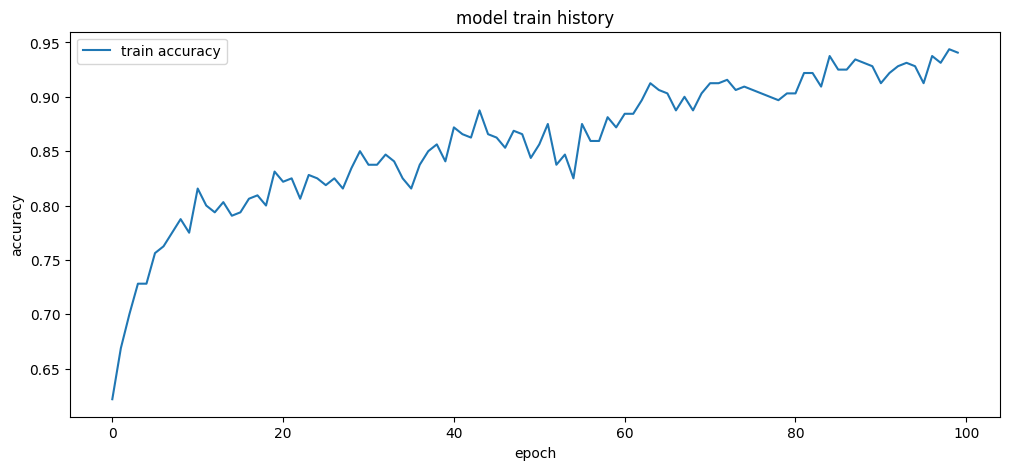

Model accuracy:  0.940625011920929


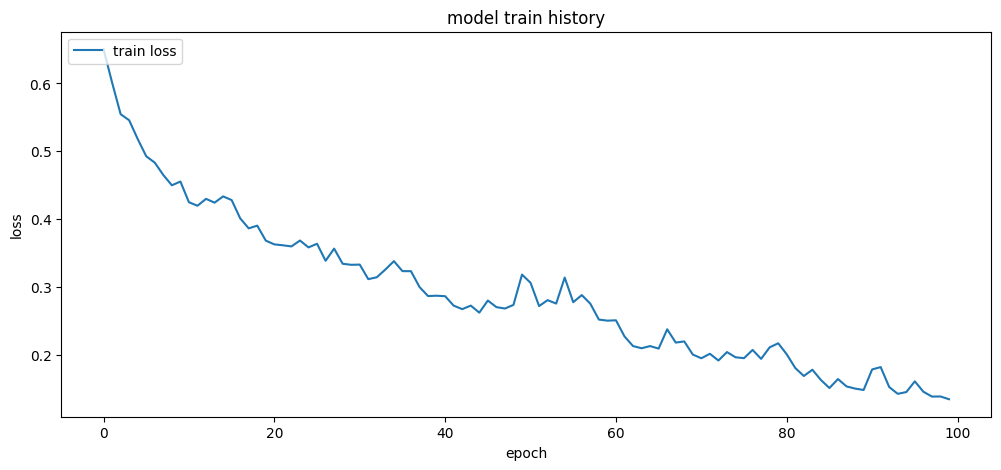

Model loss:  0.13430866599082947


In [20]:
def plot_train_result(model_result, key, legend, xlim=None, ylim=None, ):        
    plt.figure(figsize=(12, 5))

    plt.plot(model_result.history[key])

    # set title labels and legend
    plt.title('model train history')
    plt.ylabel(key)
    plt.xlabel('epoch')
    plt.legend([legend], loc='upper left')

    # set x-axis limit to zoom in specific area
    if (xlim and len(xlim) == 2):
        plt.xlim(xlim)           # specific epoch range
    if (ylim and len(ylim) == 2):
        plt.ylim(ylim)        # specific accuracy range

    # display the plot
    plt.show()
    
print(model_result.history.keys())

plot_train_result(model_result, 'accuracy', 'train accuracy')
print("Model accuracy: ", model_result.history['accuracy'][-1])

plot_train_result(model_result, 'loss', 'train loss')
print("Model loss: ", model_result.history['loss'][-1])

In [21]:
model.save('./model/model.keras')

```cpp
1. จำนวนเลเยอร์ (Layers):
   - โมเดลนี้มีทั้งหมด 4 เลเยอร์ ได้แก่:
     - Input Layer สำหรับรับข้อมูลขนาด 10 ฟีเจอร์
     - Dense Layer 3 activation function (64, 32, 1) ตามที่กำหนด

2. จำนวนเซลล์ประสาท (Neurons) ในแต่ละเลเยอร์:
   - Input Layer: รับข้อมูลขนาด (10,) (10 ฟีเจอร์)
   - Dense Layer แรก: มี 64 เซลล์ประสาท พร้อมฟังก์ชัน ReLU
   - Dense Layer ที่สอง: มี 32 เซลล์ประสาท พร้อมฟังก์ชัน ReLU
   - Dense Layer ที่สาม (Output Layer): มี 1 เซลล์ประสาท พร้อมฟังก์ชัน Sigmoid (เหมาะสำหรับการจำแนกแบบสองประเภท)

3. จำนวน Epoch และ Iteration ต่อ Epoch:
   - ในโค้ดที่ให้มาไม่ได้กำหนดจำนวน Iteration ต่อ Epoch เอาไว้ แต่ผมกำหนด Epoch ไว้ที่ 100 epochs
```